In [1]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [2]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [3]:
class State(TypedDict):         # 그래프 상태(state) 정의하는 클래스
    counter: int

In [5]:
def increment(state: State):
    print('===== increment() 노드 실행 =====')
    answer = state['counter'] + 1
    print(f"실행 결과 : {answer}")
    print('===== increment() 노드  끝 =====')

    return {'counter': answer}

In [ ]:
graph = StateGraph(State)                   # StateGraph 객체 생성

In [9]:
graph.add_node('increment', increment)      # increment 노드 추가

In [10]:
graph.add_edge(START, 'increment')          # START --> increment

In [11]:
graph.add_edge('increment', END)

In [12]:
app = graph.compile()

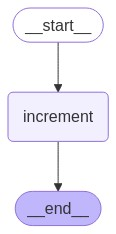

In [13]:
display(Image(app.get_graph().draw_mermaid_png()))